In [63]:
import pandas as pd
import numpy as np
import datetime

In [64]:
bidhaa=pd.read_csv("C:/pyfiles/bidhaa_sasa .csv")

In [65]:
bidhaa_df=bidhaa.copy()


In [66]:
bidhaa_df.columns

Index(['Client ID', 'Client name', 'DOB', 'AGE', 'ID Card', 'Gender',
       'Account', 'Branch', 'Product', 'Loan Principal', 'Interest',
       'Down Payment', 'Total amount', 'Principal', 'Interest.1', 'Fees',
       'Total ', 'Prepayment', 'Loan Officer', 'Cycle', 'Disbursed Date',
       'Installments', 'Loan Frequency', 'Loan Frequency 2', 'Status', 'TRP',
       'Group ID', 'Final Payment Date', 'Arrear Amount', 'Days in Arrears'],
      dtype='object')

In [67]:
bidhaa_df.drop(['Client name','ID Card','Days in Arrears'],axis=1,inplace=True)
bidhaa_df['TRP'].fillna('0%',inplace=True)
bidhaa_df['Cycle'].fillna('0',inplace=True)
dob=list(bidhaa_df['DOB'].mode())[0]
bidhaa_df['DOB'].fillna(dob,inplace=True)
f_d=list(bidhaa_df['Final Payment Date'].mode())[0]
bidhaa_df['Final Payment Date'].fillna(f_d,inplace=True)


In [19]:
bidhaa_df.isna().sum()

Client ID                 0
DOB                       0
AGE                       0
Gender                    0
Account                   0
Branch                    0
Product                   0
Loan Principal            0
Interest                  0
Down Payment              0
Total amount              0
Principal                 0
Interest.1                0
Fees                      0
Total                     0
Prepayment                0
Loan Officer              0
Cycle                     0
Disbursed Date            0
Installments              0
Loan Frequency            0
Loan Frequency 2          0
Status                    0
TRP                       0
Group ID                  0
Final Payment Date        0
Arrear Amount             0
Unnamed: 30           31516
dtype: int64

In [21]:
bidhaa_df[['Client ID','Product','Cycle']].groupby('Client ID').describe().tail()

Cycle                 Product                  
                count unique top freq   count unique   top freq
Client ID                                                      
0010-0086-46923     1      1   1    1       1      1  LPG2    1
0010-0086-46924     1      1   1    1       1      1  LPG2    1
0010-0086-46926     1      1   1    1       1      1  LPG2    1
0010-0086-46927     1      1   1    1       1      1  LPG2    1
0010-0086-46928     1      1   1    1       1      1  LPG2    1

In [22]:
bidhaa_df[['Client ID','Product','Cycle']].groupby('Product').describe()

Client ID                                Cycle                    
            count unique              top freq   count unique  top    freq
Product                                                                   
B00M          354    353  0008-0041-23404    2   354.0    2.0  1.0   323.0
BOOM         1192   1186  0003-0028-10406    2  1192.0    8.0  1.0   879.0
BORA         6028   5968  0003-0048-19187    2  6028.0    6.0  1.0  5026.0
CNVS         3408   3364  0006-0035-35310    2  3408.0    7.0  1.0  2600.0
COOK          615    609  0002-0052-18576    2   615.0    5.0  1.0   374.0
CVS2          466    465  0009-0064-34843    2   466.0    4.0  1.0   405.0
EPC            17     17   0002-0021-8143    1    17.0    5.0  1.0     9.0
GASC          272    272  0009-0071-23416    1   272.0    3.0  1.0   245.0
HOME          423    423  0009-0073-30731    1   423.0    2.0  1.0   393.0
JIKO         1102   1099  0008-0057-21581    2  1102.0    3.0  1.0  1050.0
KUNI           11     11  0003-0034-40890    1    11.0    5.0  1.0     6.0
LPG2         9037   8848  0006-0038-26115    3  9037.0    6.0  1.0  8091.0
LPG3         5553   5537  0009-0065-20336    2  5553.0    4.0  1.0  4813.0
MRKT           17     17   0002-0018-3784    1    17.0    2.0  1.0    10.0
P400         1192   1140   0002-0017-5354    3  1192.0    6.0  1.0   845.0
PRO4          240    238  0008-0060-29466    2   240.0    3.0  1.0   222.0
SILO           51     51  0003-0028-27449    1    51.0    3.0  1.0    24.0
SKH+         1029   1024   0006-0036-9942    2  1029.0    5.0  1.0   809.0
SLO2            5      5  0009-0061-27846    1     5.0    2.0  1.0     4.0
SPRA          137    137   0002-0027-8759    1   137.0    5.0  1.0    80.0
TANK          173    173  0009-0073-43420    1   173.0    4.0  1.0   104.0
TNK           194    194  0009-0065-29307    1   194.0    2.0  1.0   192.0

### 1. can you infer from this data in which order clients that bought more than one product make their purchases? Do they first buy an LPG and then a stove or a solar lamp?
### Pulling the client ID data, product and cycle data and then grouping the same by cycle to get the buying patterns

In [23]:
bidhaa_df[['Client ID','Product','Cycle']].groupby('Cycle').describe()

Client ID                              Product                   
          count unique              top freq   count unique   top  freq
Cycle                                                                  
1.0       26504  26504  0004-0031-35929    1   26504     22  LPG2  8091
2.0        3482   3482  0003-0048-22636    1    3482     22  BORA   836
3.0         643    643  0006-0037-10076    1     643     17  CNVS   143
4.0         145    145   0001-0000-1332    1     145     12  LPG2    35
5.0          35     35   0001-0000-0213    1      35      8  LPG2     8
6.0          10     10   0001-0000-0722    1      10      6  CNVS     3
7.0           3      3   0001-0000-1255    1       3      3  CNVS     1
8.0           1      1   0001-0000-0076    1       1      1  BOOM     1
0           693    693  0009-0065-22213    1     693      1  LPG3   693

### 2. any correlation/pattern between age of client and choice of product bought?

In [49]:
prod_corr=bidhaa_df['Product']

In [51]:
age=np.array(bidhaa_df['AGE'])

In [56]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

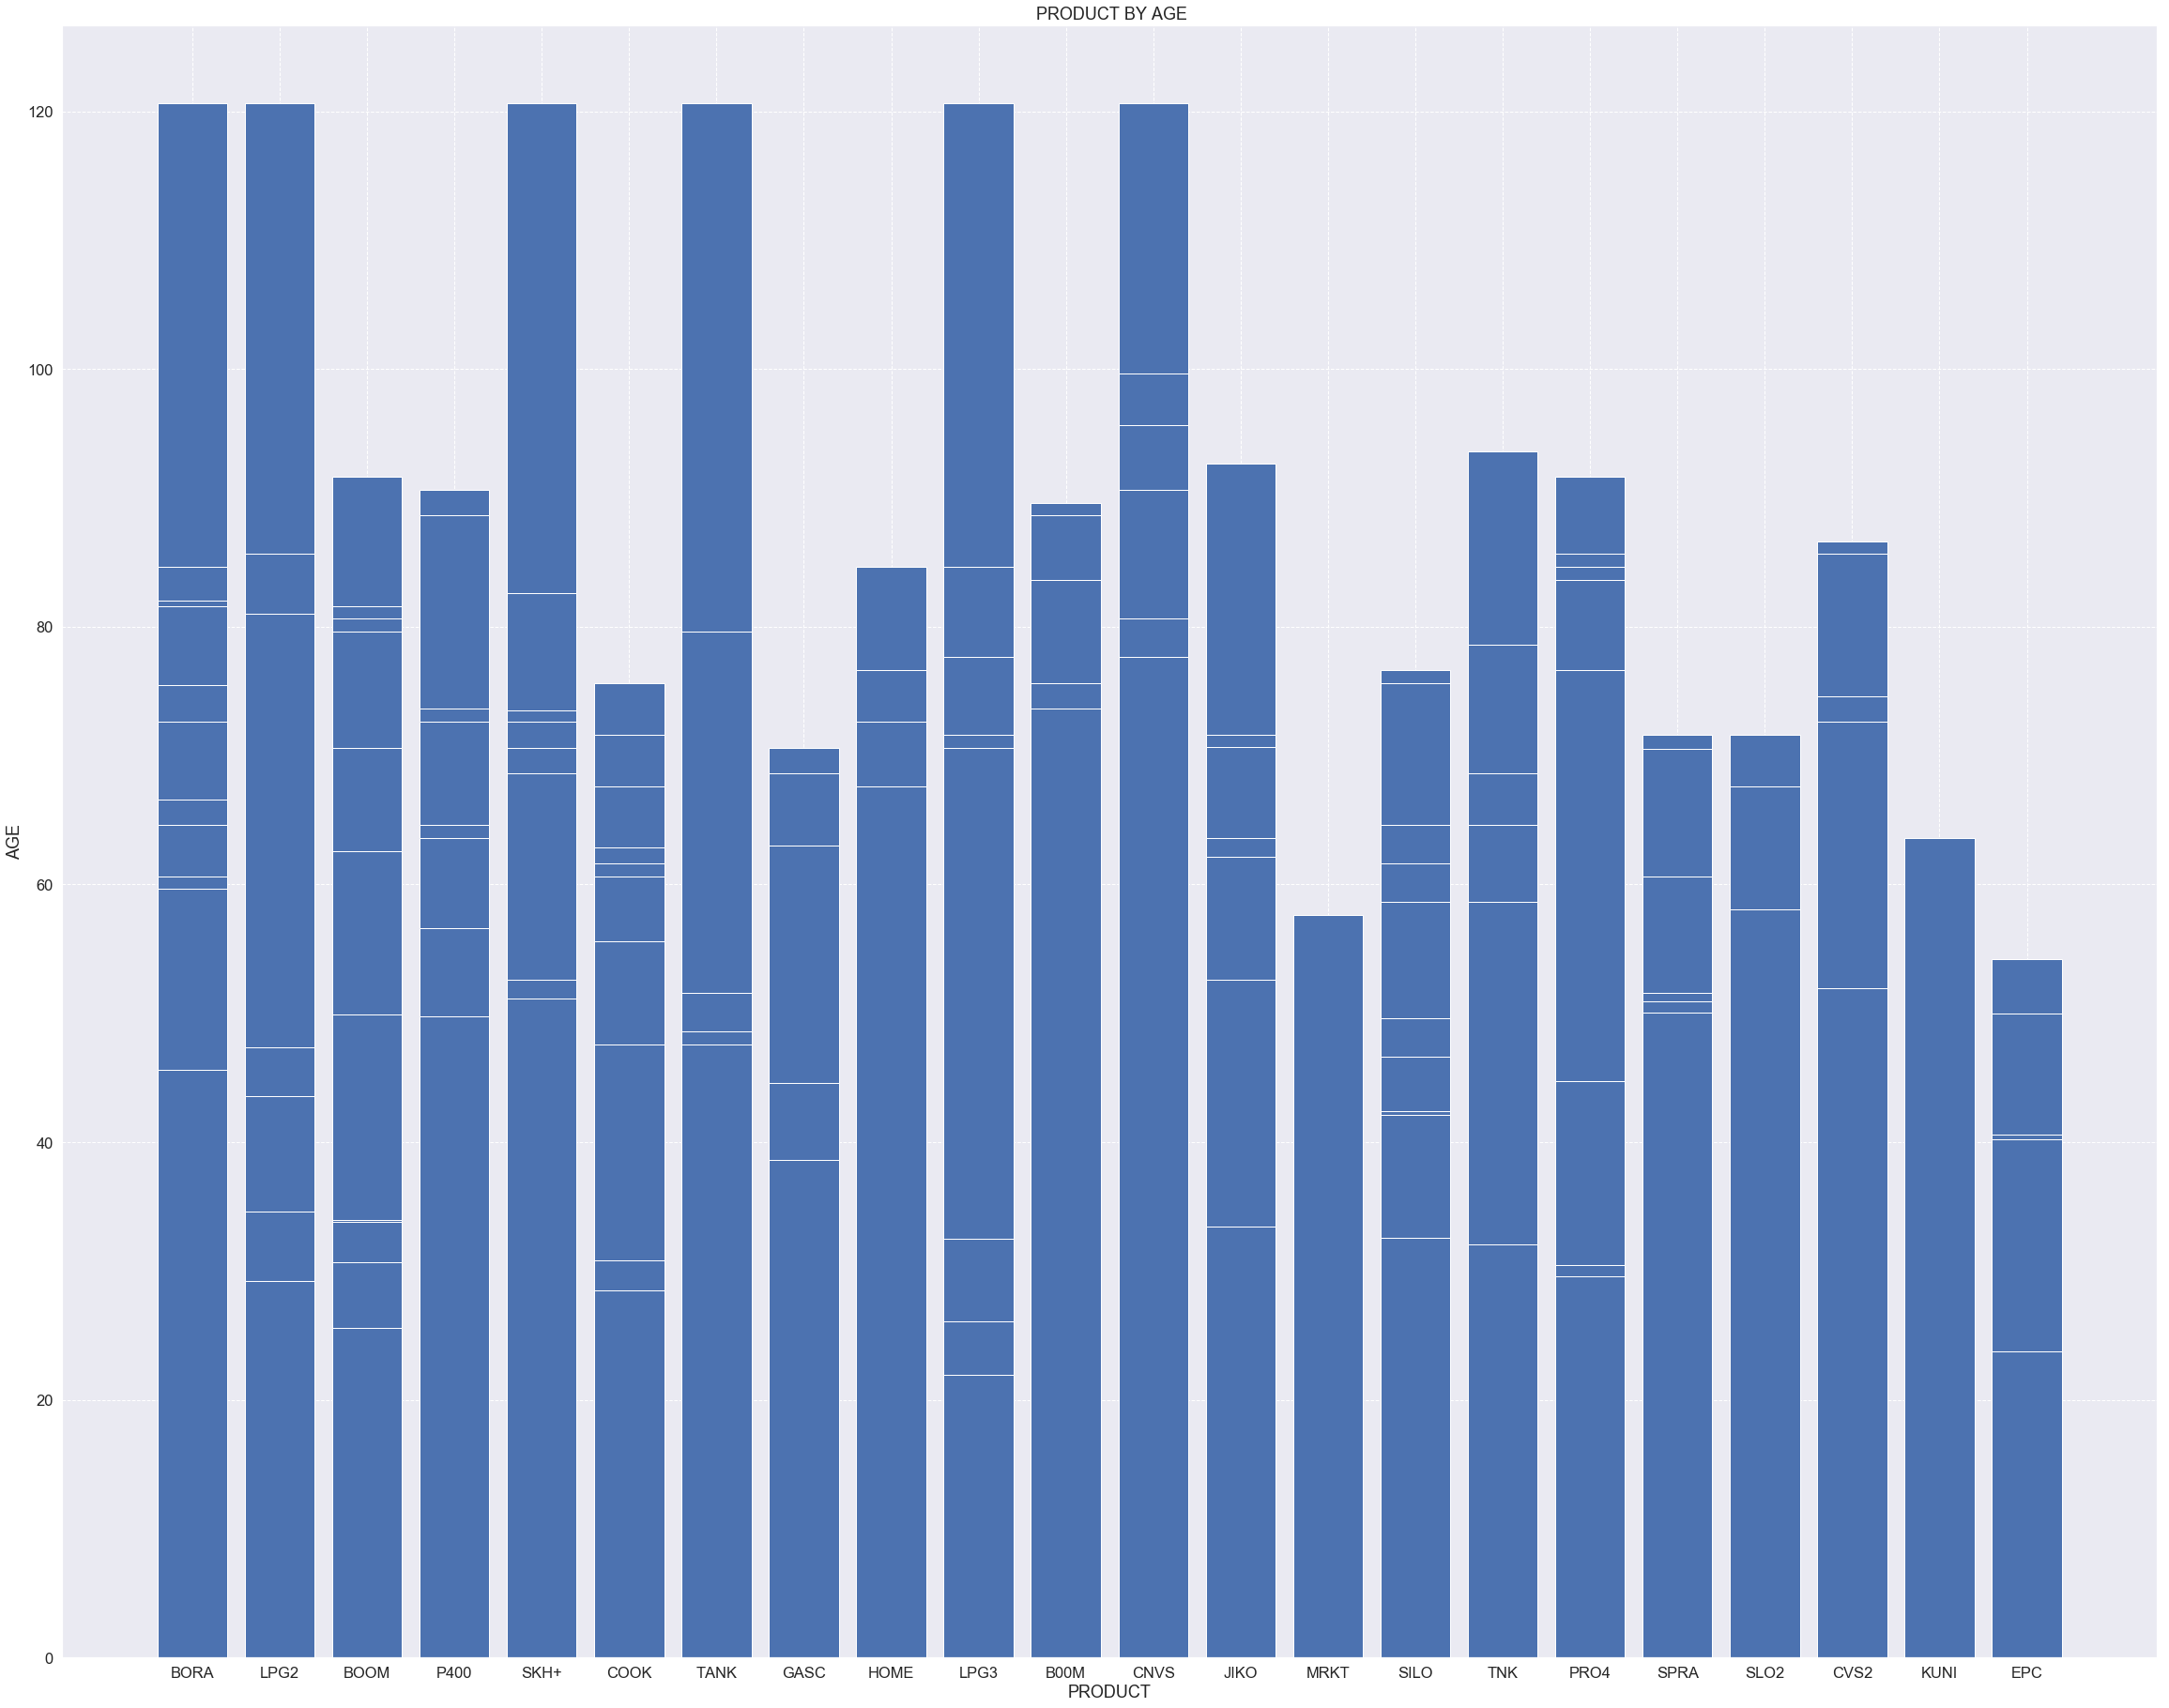

In [61]:
plt.figure(figsize=(40, 32))
plt.bar(prod_corr,age)
plt.xlabel('PRODUCT')
plt.ylabel('AGE')
plt.title(' PRODUCT BY AGE')
plt.grid(True, linewidth= 1, linestyle="--")
plt.show()

### 3. repayment behaviour measured with TRP and choice of product bought?


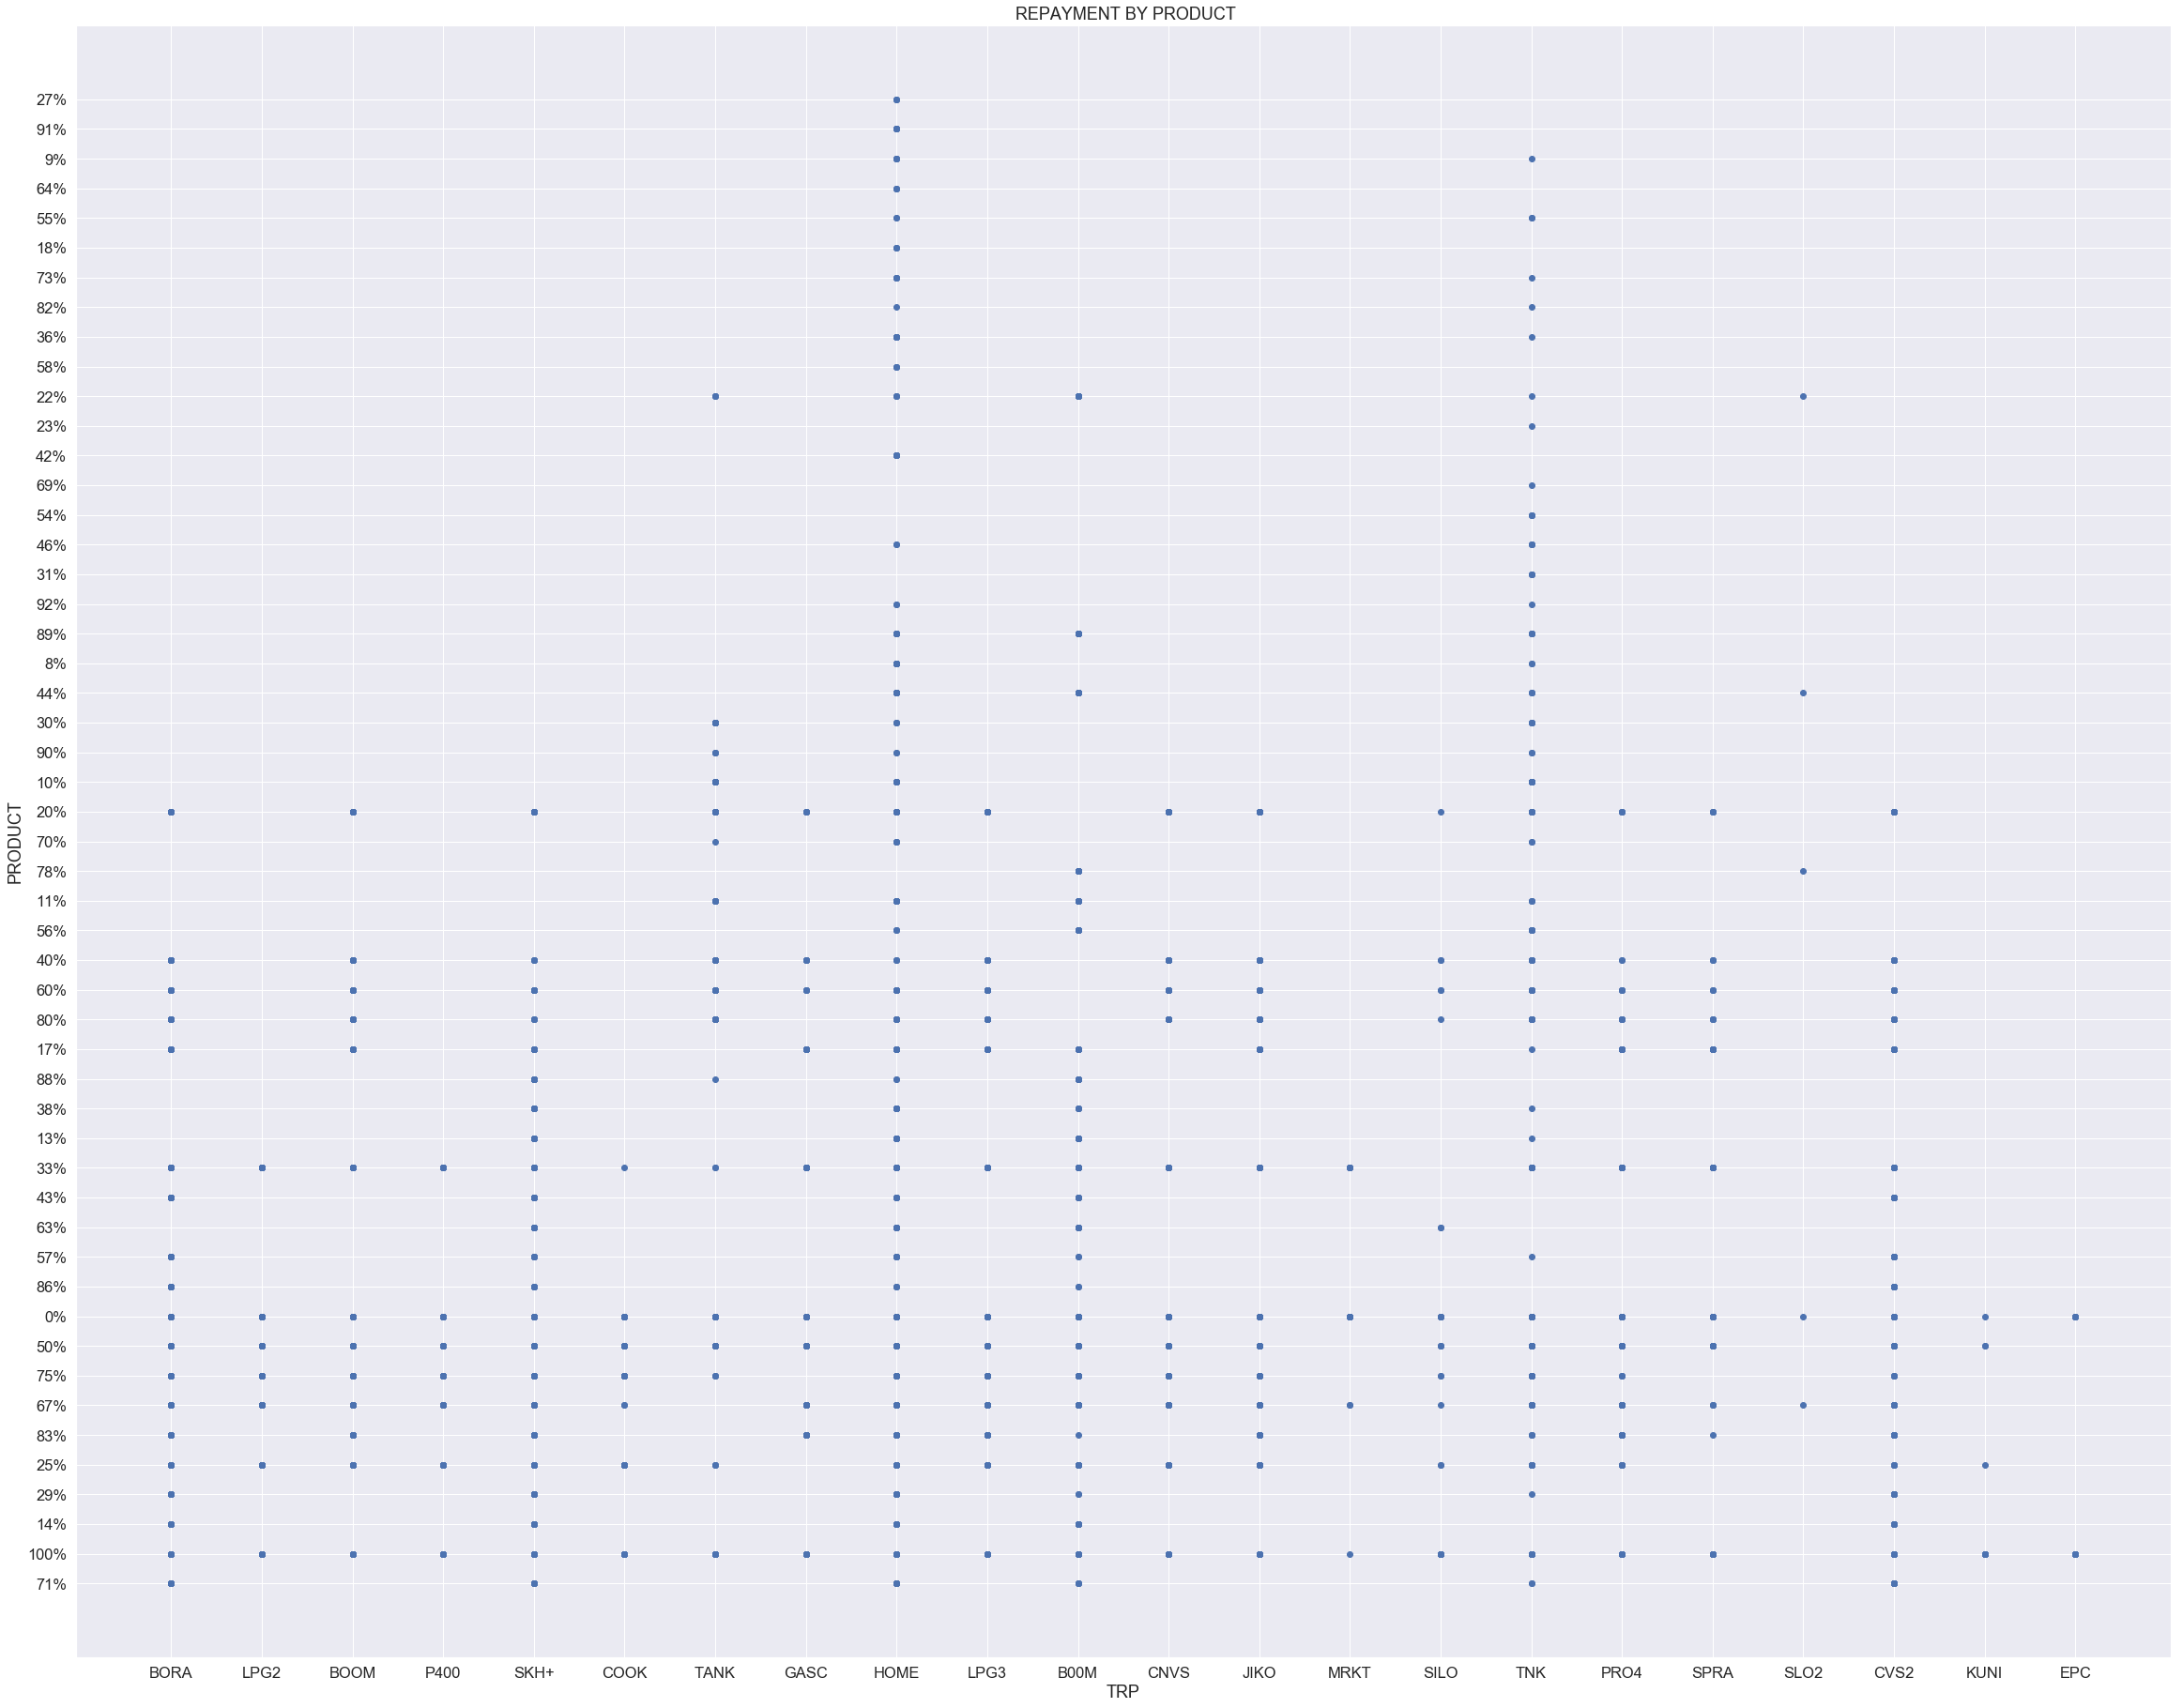

In [76]:
trp=bidhaa_df['TRP']
plt.figure(figsize=(40, 32))
plt.scatter(prod_corr,trp)
plt.xlabel('TRP')
plt.ylabel('PRODUCT')
plt.title(' REPAYMENT BY PRODUCT')
plt.show()

### 4. any correlation/pattern between gender and choice of product bought?


<BarContainer object of 31516 artists>

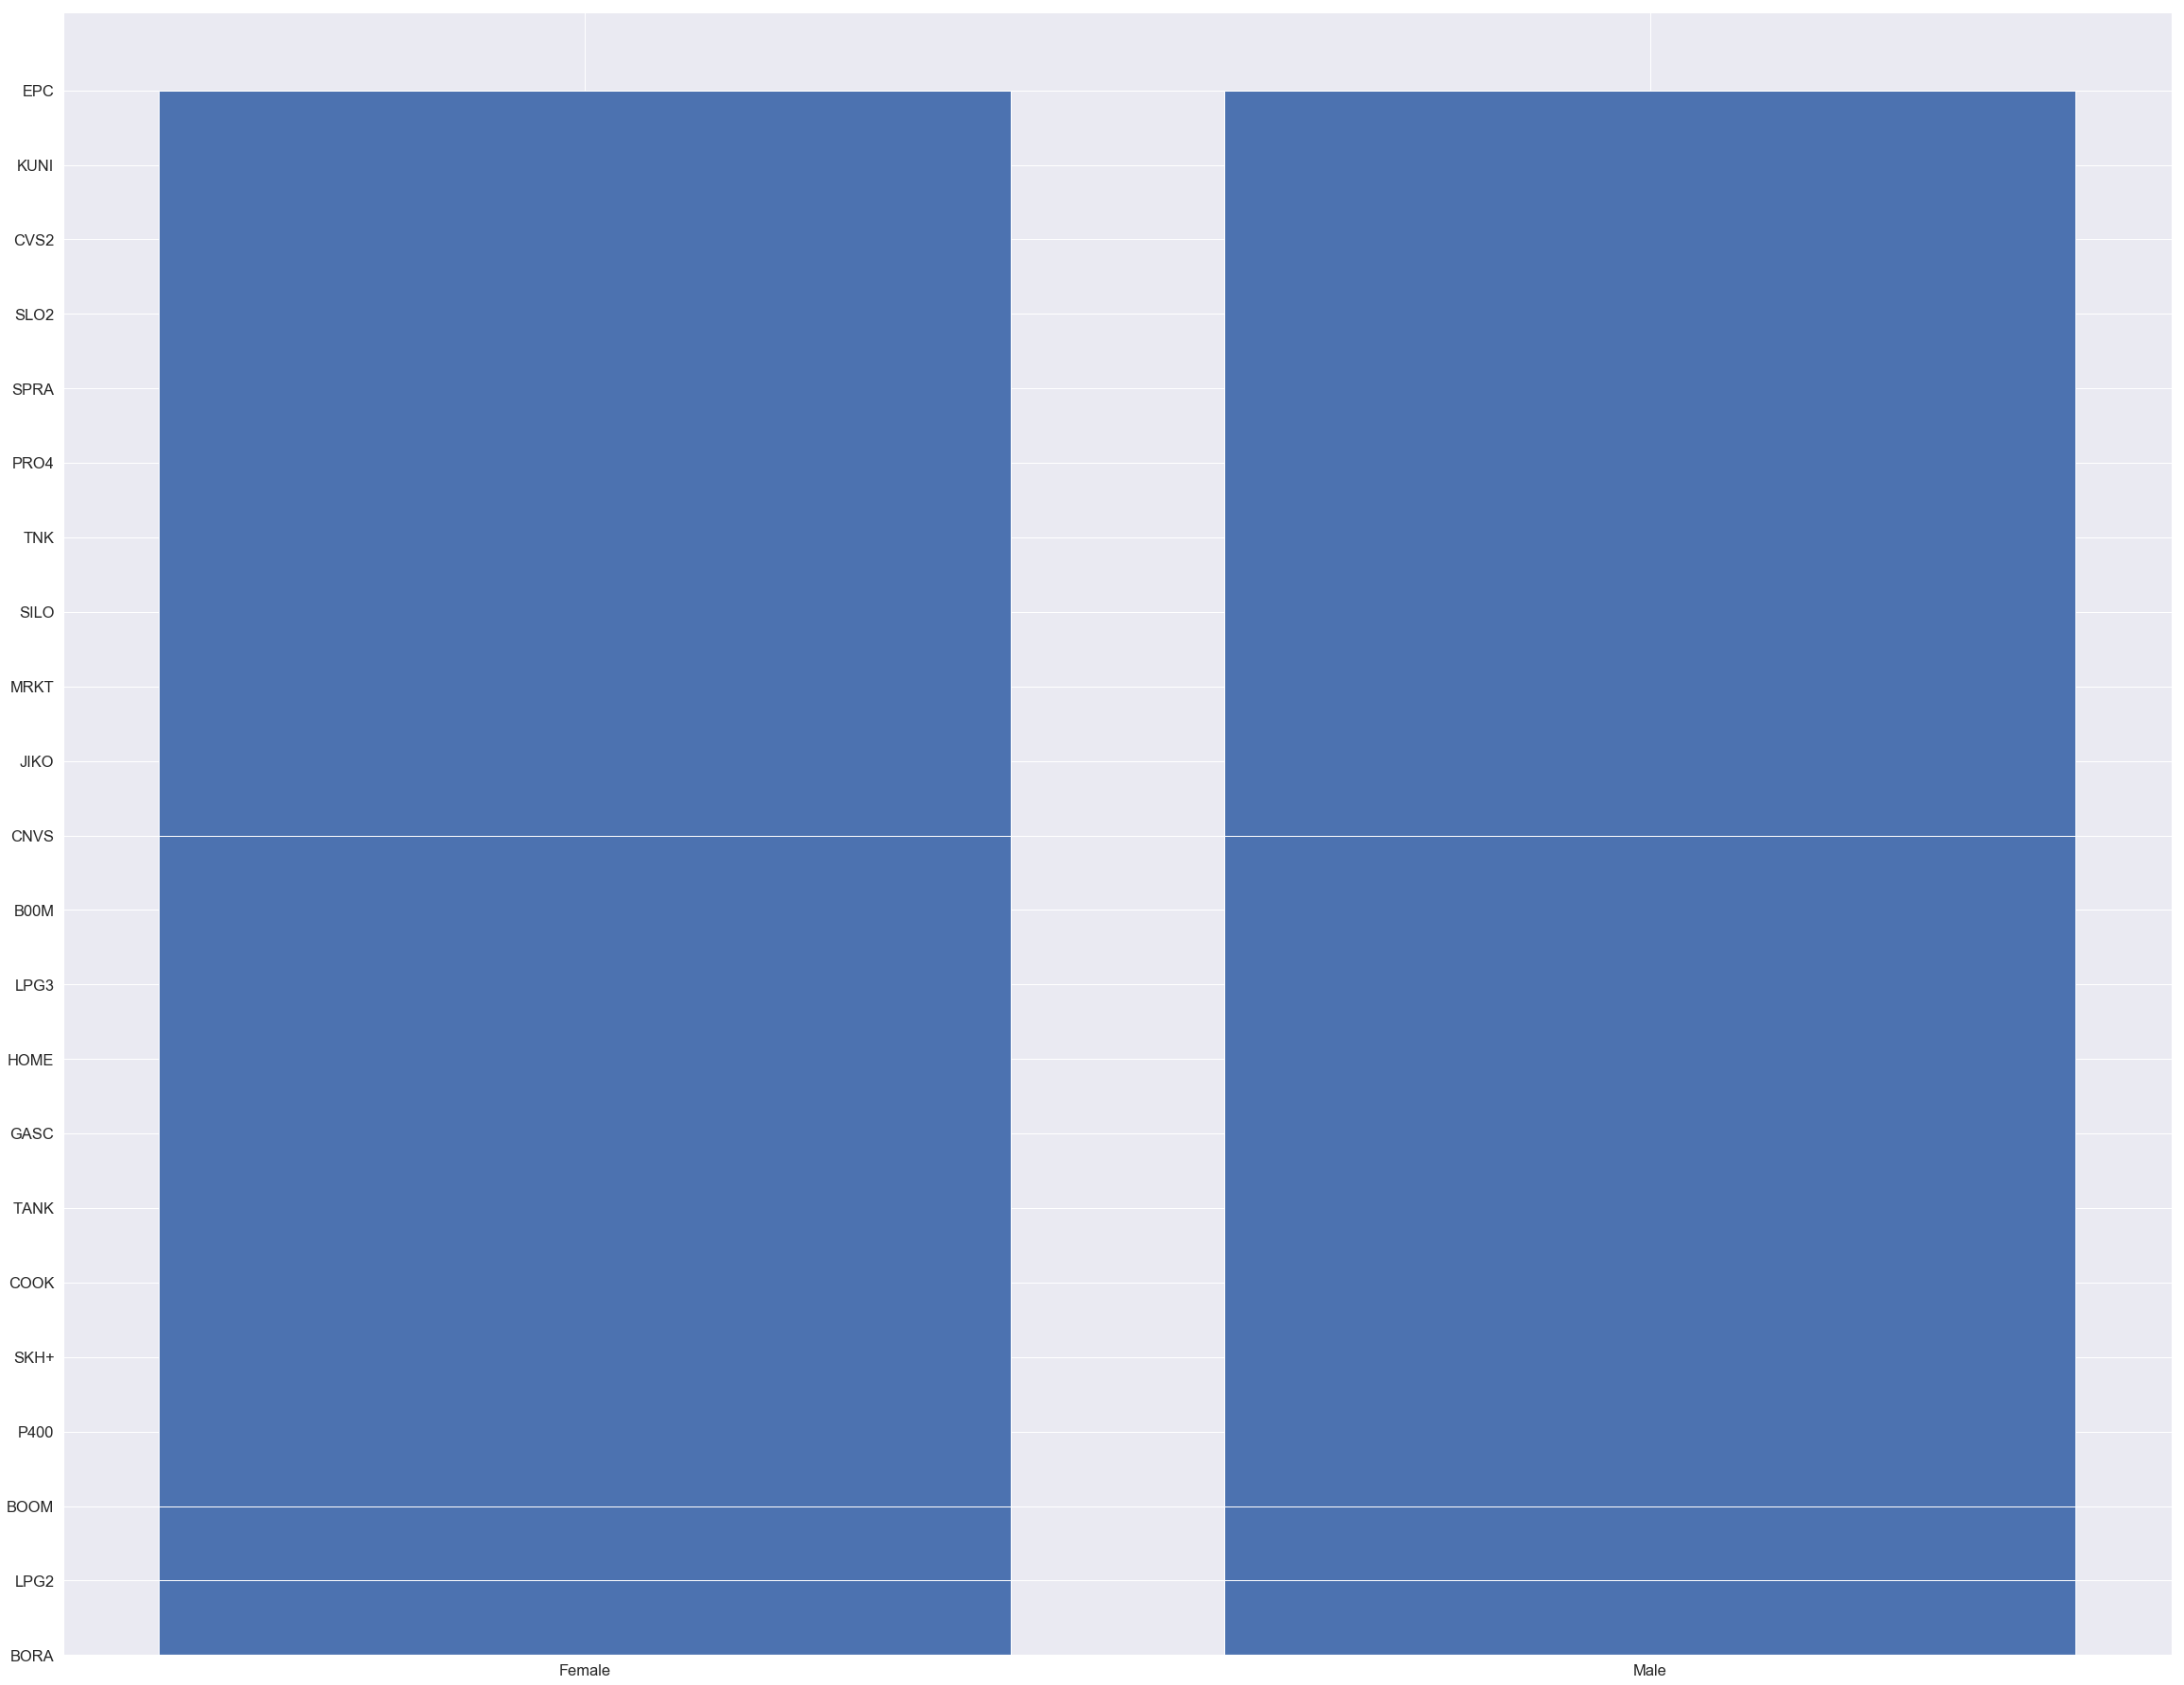

In [80]:
prod_corr=bidhaa_df['Product']
gender=bidhaa_df['Gender']
plt.figure(figsize=(40, 32))
plt.bar(gender,prod_corr)